In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])
df.drop(df[df['horsepower']=='?'].index,inplace=True)
df['horsepower']=df['horsepower'].astype('float64')
df.replace('vokswagen','volkswagen',inplace=True)
df.replace('vw','volkswagen',inplace=True)
df.replace('toyouta','toyota',inplace=True)
df.replace('mercedes','mercedes-benz',inplace=True)
df.replace('maxda','mazda',inplace=True)
df.replace('chevroelt','chevrolet',inplace=True)
df.replace('chevy','chevrolet',inplace=True)
df.replace('hi','ih',inplace=True)
#dividing cars into 3 categories by weight
min_wt = min(df['weight'])
max_wt = max(df['weight'])
per_bin = (max_wt - min_wt)/3

bin1_start = min(df['weight'])
bin1_end = bin1_start + per_bin
bin2_end = bin1_end + per_bin

def label_wt(row):
    if bin1_start <= row['weight'] and row['weight'] <= bin1_end:
        return 'light'
    elif row['weight'] <= bin2_end:
        return 'medium'
    else:
        return 'heavy'
df['weight_categ'] = df.apply(lambda row: label_wt(row),axis=1)

In [2]:
class LinearRegression:
    #constructor to initialize the coefficient array
    def __init__(self):
        self.b = []
        
    def fit(self,x,y,order):
        N = len(x)
        if order == 0:
            X = np.c_[np.ones(N)]
        elif order == 1:
            X = np.c_[np.ones(N),x]
        elif order == 2:
            X = np.c_[np.ones(N),x,np.square(x)]
        else:
            X = np.c_[np.ones(N),x,np.square(x),np.power(x,3)]
#         print(X)
        self.b = X.T@y@np.linalg.inv(X.T@X)
        


    def predict(self,x):
#         print(self.b)
        prediction = []
        for i in range(len(x)):
            pred = self.b[0]
            for j in range(1,len(self.b)):
                pred+=self.b[j]*np.power(x[i],j)
            prediction.append(pred)
        return prediction
    
    def mse(self,y,prediction):
        s = 0
        for i in range(len(y)):
            s+=(y[i]-prediction[i])**2
        score = s/len(y)
        return score

### 1: [20pt]


#### (a) Split the dataset 70:30 for training and testing respectively.

I split the data manually, calculation what 70% of 392 would be for training size, and used the rest of the rows for testing

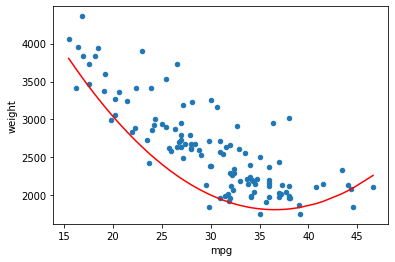

In [3]:
classifier = LinearRegression()
train_data = df[:275]
test_data = df[275:]
train_y = np.array(train_data['weight'])
test_y = np.array(test_data['weight'])

lr = LinearRegression()
lr.fit(np.array(train_data['mpg']), train_y, 2)
pred = lr.predict(sorted(test_data['mpg']))
ax = test_data.plot.scatter(x='mpg', y='weight')
ax.plot(sorted(test_data['mpg']), pred, 'r' )

The make_model function performs the training and testing of the regression model for a particular feature and given order of polynomial, and also calculates the training and testing MSE

The all_orders function goes through each feature, one by one, and makes regression models for each order and plots the regression lines. I've stored the predicted values for all the orders for a feature in a dataframe, so that I can use the plot.line function to plot the line. In order to generate the smooth lines, I've sorted the test data before making predictions on it.

In [4]:
def make_model(feature,order):
    classifier.fit(np.array(train_data[feature]),train_y,order)
    prediction = classifier.predict(np.array(train_data[feature]))
    print(feature,"Training MSE:",classifier.mse(train_y,prediction))
    prediction = classifier.predict(sorted(np.array(test_data[feature])))
    print(feature,"Testing MSE:",classifier.mse(test_y,prediction))
    return prediction

feats = ['mpg','cylinders','displacement','acceleration','horsepower','model_year','origin']

def all_orders(feat):
    all_y = []
    for order in range(4):
        print("Order",order)
        p = make_model(feat,order)
        all_y.append(p)
    temp = pd.DataFrame({
        '0th order':all_y[0],
        '1st order':all_y[1],
        '2nd order':all_y[2],
        '3rd order':all_y[3]
    },index=sorted(test_data[feat]))
    ax = temp.plot.line()
    test_data.plot.scatter(x=feat, y='weight', ax=ax)

#### (b) Use your solution to regress weight (dependent variable) on each of the 7 non-car_name features (independent variables). Do this for the 0th to 3rd order of the independent variables.
#### (c) Calculate the training and testing mean squared errors for each variable and order individually.

Each call all_orders makes to the function make_model answers both these questions.

#### (d) Plot the lines and data for the testing set, one plot per variable (so 4 lines in each plot, 7 plots total). Which polynomial order performs the best in the test set?

After the predictions are made, I use the plot.line function in pandas to make the plots. Your answer for which order performs might be different from mine, and that's completely normal!

Order 0
mpg Training MSE: 798637.0201652881
mpg Testing MSE: 613790.4446054957
Order 1
mpg Training MSE: 171428.49672265822
mpg Testing MSE: 1223856.7374914913
Order 2
mpg Training MSE: 123756.58771582555
mpg Testing MSE: 512663.67161510244
Order 3
mpg Training MSE: 123051.33486732429
mpg Testing MSE: 504380.25480290607


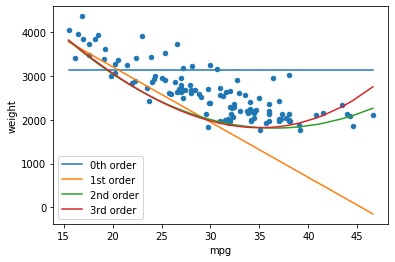

In [5]:
#MPG
all_orders('mpg')

Order 0
cylinders Training MSE: 798637.0201652881
cylinders Testing MSE: 613790.4446054957
Order 1
cylinders Training MSE: 146221.52158340195
cylinders Testing MSE: 780751.4599907874
Order 2
cylinders Training MSE: 146157.206165959
cylinders Testing MSE: 776090.9024984388
Order 3
cylinders Training MSE: 142771.52740231177
cylinders Testing MSE: 786984.0566940659


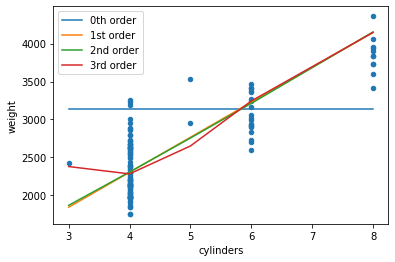

In [6]:
#cylinders
all_orders('cylinders')

Order 0
displacement Training MSE: 798637.0201652881
displacement Testing MSE: 613790.4446054957
Order 1
displacement Training MSE: 107484.76464171782
displacement Testing MSE: 738573.2458170148
Order 2
displacement Training MSE: 98737.74035369285
displacement Testing MSE: 811687.2885260105
Order 3
displacement Training MSE: 98255.87884146234
displacement Testing MSE: 802830.3199595928


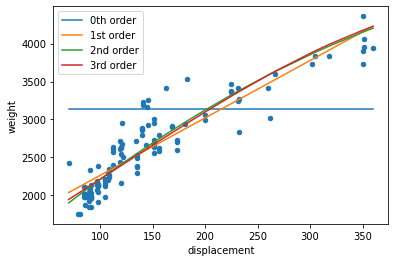

In [7]:
#Displacement
all_orders('displacement')

Order 0
acceleration Training MSE: 798637.0201652881
acceleration Testing MSE: 613790.4446054957
Order 1
acceleration Training MSE: 598804.303949411
acceleration Testing MSE: 502398.65368514037
Order 2
acceleration Training MSE: 581759.3274680515
acceleration Testing MSE: 429194.5423017998
Order 3
acceleration Training MSE: 574514.0104985588
acceleration Testing MSE: 449300.05975733453


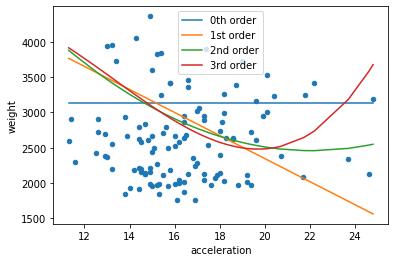

In [8]:
#Acceleration
all_orders('acceleration')

Order 0
horsepower Training MSE: 798637.0201652881
horsepower Testing MSE: 613790.4446054957
Order 1
horsepower Training MSE: 205764.8947762161
horsepower Testing MSE: 631099.9132913194
Order 2
horsepower Training MSE: 167872.36833153997
horsepower Testing MSE: 832898.8786045582
Order 3
horsepower Training MSE: 160584.6547934279
horsepower Testing MSE: 783109.7328561872


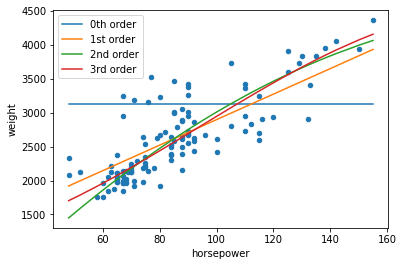

In [9]:
#Horsepower
all_orders('horsepower')

Order 0
model_year Training MSE: 798637.0201652881
model_year Testing MSE: 613790.4446054957
Order 1
model_year Training MSE: 785022.6637221373
model_year Testing MSE: 380888.8474710855
Order 2
model_year Training MSE: 784186.2467476522
model_year Testing MSE: 319216.84925542225
Order 3
model_year Training MSE: 783967.1871109662
model_year Testing MSE: 369318.9575225356


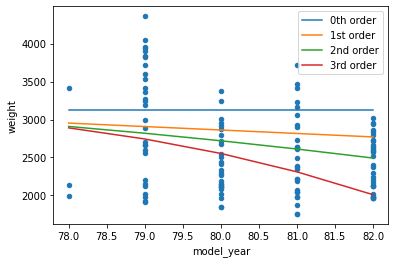

In [10]:
all_orders('model_year')

Order 0
origin Training MSE: 798637.0201652881
origin Testing MSE: 613790.4446054957
Order 1
origin Training MSE: 494854.4731769465
origin Testing MSE: 753307.6614293497
Order 2
origin Training MSE: 464216.2713694175
origin Testing MSE: 694222.3426024837
Order 3
origin Training MSE: 2632607.8181818184
origin Testing MSE: 4051409.1196581195


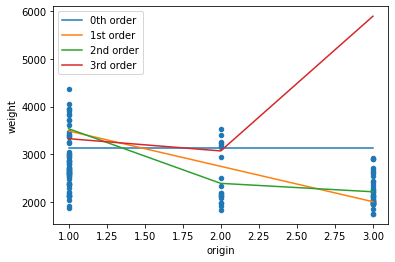

In [11]:
all_orders('origin')

For attributes mpg and origin, a polynomial of order 3 performs best.\
For attributes cylinders, model_year and acceleration, a polynomial of order 2 performs best.\
For attributes horsepower and displacement, a polynomial of order 0 performs best.

#### (e) Repeat your analysis using an 80:20 train:test split. How does your answer change?

I calculate the split manually, taking 80% of 392 rows to be the training set and the remaining to be the test set.

In [12]:
train_data = df[:314]
test_data = df[314:]
train_y = np.array(train_data['weight'])
test_y = np.array(test_data['weight'])

Order 0
mpg Training MSE: 772122.5036309789
mpg Testing MSE: 586953.2473897625
Order 1
mpg Training MSE: 190391.51746668853
mpg Testing MSE: 1018915.7830386943
Order 2
mpg Training MSE: 136999.69227176096
mpg Testing MSE: 378118.8920842172
Order 3
mpg Training MSE: 136514.4007798759
mpg Testing MSE: 376009.06745755987


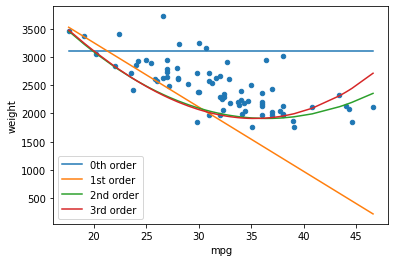

In [13]:
all_orders('mpg')

Order 0
cylinders Training MSE: 772122.5036309789
cylinders Testing MSE: 586953.2473897625
Order 1
cylinders Training MSE: 147185.68229645153
cylinders Testing MSE: 308595.2660693161
Order 2
cylinders Training MSE: 147160.92472143588
cylinders Testing MSE: 305936.5293826132
Order 3
cylinders Training MSE: 144907.96718255748
cylinders Testing MSE: 298127.52967071766


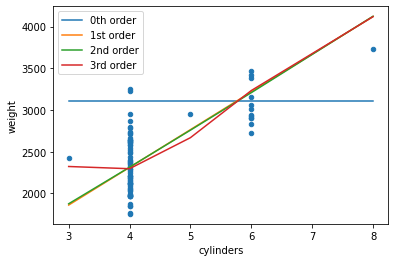

In [14]:
all_orders('cylinders')

Order 0
displacement Training MSE: 772122.5036309789
displacement Testing MSE: 586953.2473897625
Order 1
displacement Training MSE: 101738.60448942184
displacement Testing MSE: 293465.9560405898
Order 2
displacement Training MSE: 92760.70700927093
displacement Testing MSE: 331526.8204560318
Order 3
displacement Training MSE: 92704.78634753526
displacement Testing MSE: 329020.87851631123


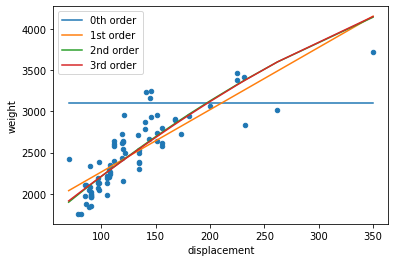

In [15]:
all_orders('displacement')

Order 0
acceleration Training MSE: 772122.5036309789
acceleration Testing MSE: 586953.2473897625
Order 1
acceleration Training MSE: 617350.1971250087
acceleration Testing MSE: 542682.6928205494
Order 2
acceleration Training MSE: 588631.8547261822
acceleration Testing MSE: 467527.4021686618
Order 3
acceleration Training MSE: 583676.5792018529
acceleration Testing MSE: 490207.3114288008


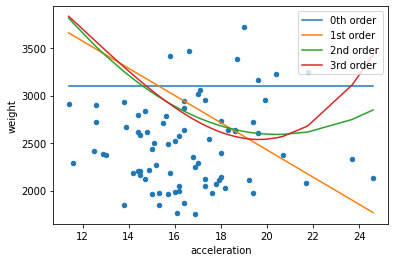

In [16]:
all_orders('acceleration')

Order 0
horsepower Training MSE: 772122.5036309789
horsepower Testing MSE: 586953.2473897625
Order 1
horsepower Training MSE: 198844.59732971116
horsepower Testing MSE: 264066.560639534
Order 2
horsepower Training MSE: 163777.01214545098
horsepower Testing MSE: 359470.0528830061
Order 3
horsepower Training MSE: 157741.06745161765
horsepower Testing MSE: 318226.81532160146


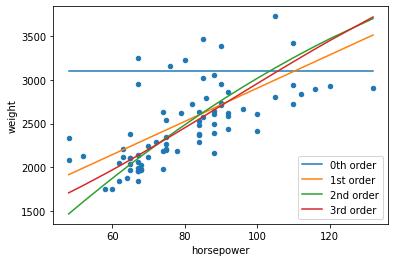

In [17]:
all_orders('horsepower')

Order 0
model_year Training MSE: 772122.5036309789
model_year Testing MSE: 586953.2473897625
Order 1
model_year Training MSE: 753526.8014386583
model_year Testing MSE: 300121.8382842051
Order 2
model_year Training MSE: 752684.3056434754
model_year Testing MSE: 236333.43272819818
Order 3
model_year Training MSE: 752471.3970084056
model_year Testing MSE: 211618.2063048577


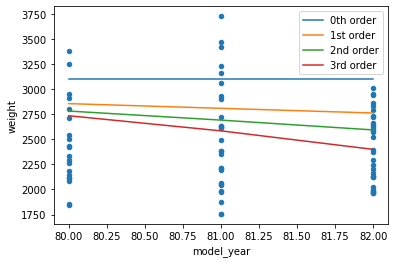

In [18]:
all_orders('model_year')

Order 0
origin Training MSE: 772122.5036309789
origin Testing MSE: 586953.2473897625
Order 1
origin Training MSE: 491511.35646838835
origin Testing MSE: 786990.4126852561
Order 2
origin Training MSE: 468558.20586855314
origin Testing MSE: 792015.5844381191
Order 3
origin Training MSE: 126491369.45859873
origin Testing MSE: 259075790.44871795


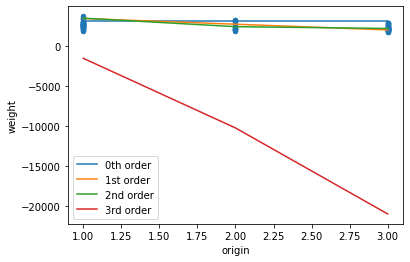

In [19]:
all_orders('origin')

For attributes cylinders and model_year, a polynomial of order 3 performs best.\
For attributes mpg and acceleration, a polynomial of order 2 performs best.\
For attributes displacement and horsepower, a polynomial of order 1 performs best.\
For origin, a polynomial of order 0 performs best.

### 2: [10pt]

#### (a) Using logistic regression (1st order), perform classification on the various classes (light/medium/heavy). Create one regression model per feature.

I re-defined the make_model function to build a logistic regression model for every feature in the dataset. The dependent variable is the weight_categ column I had created in Q2.

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split


y = df['weight_categ']
x = df.drop(['weight_categ','car_name'],1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
classifier = LogisticRegression()

def make_model(feature):
    classifier.fit(np.array(x_train[feature]).reshape(-1,1),y_train)
    mpg_pred = classifier.predict(np.array(x_test[feature]).reshape(-1,1))
    print(feature,"Precision:",precision_score(y_test,mpg_pred,average='macro',zero_division=0))
    print(feature,"Recall:",recall_score(y_test,mpg_pred,average='macro',zero_division=0))

#### (b) Report the training/testing classification performance using both precision and recall. For this classification task, give an example and explain when each of the metrics would be more desirable.

I used the metrics provided in sklearns library to calculate the precision and recall score. The zero_division parameter prevents a zero division warning from being thrown.\
Your explanation for which metric is more desirable can be based on this classification task, or any other classification task as well (as my answer to this question is).

In [21]:
#model for mpg
make_model('mpg')
#model for cylinders
make_model('cylinders')
#model for displacement
make_model('displacement')
#model for horsepower
make_model('horsepower')
#model for weight
make_model('weight')
#model for acceleration
make_model('acceleration')
#model for model_year
make_model('model_year')
#model for origin
make_model('origin')

mpg Precision: 0.7481158186076219
mpg Recall: 0.7723665223665224
cylinders Precision: 0.8002645502645502
cylinders Recall: 0.8382034632034632
displacement Precision: 0.781986531986532
displacement Recall: 0.7557720057720058
horsepower Precision: 0.7458492975734354
horsepower Recall: 0.7451899951899952
weight Precision: 0.9925925925925926
weight Recall: 0.9814814814814815
acceleration Precision: 0.3363459152932837
acceleration Recall: 0.48214285714285715
model_year Precision: 0.3333333333333333
model_year Recall: 0.40145502645502645
origin Precision: 0.4338227949255818
origin Recall: 0.49134199134199136


Example where recall is more desirable- any kind of disease prediction model where false negatives cannot be taken lightly.
Where precision is more desirable- Spam email detector- false positive may lead to important email being missed.

### 3: [5pt]


(a) Re-do the logistic regression training/testing, but now after you apply min-max normalization to the dataset. Do you see any difference in performance?

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(x)
x.loc[:,:] = scaled_values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
#model for mpg
make_model('mpg')
#model for cylinders
make_model('cylinders')
#model for displacement
make_model('displacement')
#model for horsepower
make_model('horsepower')
#model for weight
make_model('weight')
#model for acceleration
make_model('acceleration')
#model for model_year
make_model('model_year')
#model for origin
make_model('origin')

mpg Precision: 0.4746976294146106
mpg Recall: 0.5677128741644871
cylinders Precision: 0.8413840639647091
cylinders Recall: 0.8721301947108399
displacement Precision: 0.8701723113487819
displacement Recall: 0.8523761452454153
horsepower Precision: 0.779810298102981
horsepower Recall: 0.6704599336178284
weight Precision: 0.9324929971988795
weight Recall: 0.8757705073494547
acceleration Precision: 0.4067460317460318
acceleration Recall: 0.40350877192982454
model_year Precision: 0.1783625730994152
model_year Recall: 0.3279569892473118
origin Precision: 0.46118863049095604
origin Recall: 0.5213600697471665


In most cases, precision and recall has decreased.

### 4: [15pt]

#### For each part: Make your prediction using either a single linear or logistic regression that includes all regression terms. Attempt to use a combination of first and second order terms.

#### (a) If a USA manufacturer (origin 1) had considered to introduce a model in 1981 with the following characteristics: 4 cylinders, 400 cc displacement, 150 horsepower, 3500 lb weight, 8 m/sec2 acceleration, what is the MPG rating that we should have expected?

As we're trying to predict a continuous variable(mpg), a linear regression model would be the choice of model we should build. I have used only one second order feature, acceleration, and all other features are first order

In [23]:
from sklearn.linear_model import LinearRegression
y = df['mpg']
x = df.drop(['mpg','weight_categ','car_name','acceleration'],1)
x['acc_order2'] = df['acceleration']**2

linear = LinearRegression()
linear.fit(x,y)
mpg = linear.predict(np.array([[4,400.0,150.0,3500.0,81,1,64.0]]))
print("MPG predicted:",mpg[0])

MPG predicted: 26.35685750137228


#### (b) In which weight class (light, medium, heavy) would it belong?

As we're trying to classify this car into a weight class, we should build a logistic regression model. I used the mpg feature as an attribute too, just so that I could use the prediction I made in part a) to also predict the weight class. Again, the only second order feature I used is acceleration

In [24]:
y = df['weight_categ']
x = df.drop(['weight_categ','car_name','acceleration'],1)
x['acc_order2'] = df['acceleration']**2

log = LogisticRegression()
log.fit(x,y)
weight_class = log.predict(np.array([[26.1,4,400.0,150.0,3500.0,81,1,64.0]]))
print("Weight Class predicted:",weight_class[0])

Weight Class predicted: medium


c:\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
